#### Required libraries.

In [11]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from plotly import graph_objs as go
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

#### Read data.

In [12]:
data = pd.read_csv(r"D:\SEMESTER-5\Econometrics and  ML in Finance\Project\FINAL_USO.csv", parse_dates = True, infer_datetime_format = True)

In [13]:
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  \
0      48.973877    20605600  36.900002  36.939999  36.049999  36.130001   
1      49.921513    16285400  36.180000  36.500000  35.730000  36.270000   
2      48.490578    15120200  36.389999  36.450001  35.930000  36.200001   
3      50.215282    11644900  37.299999  37.610001  37.220001  37.560001   
4      50.186852     8724300  37.669998  38.240002  37.520000  38.110001   

   USO_Adj Close  USO_Volume  
0      36.130001    12616700  
1      36.270000    12578800  
2      36.200001     7418200  
3      37.560001    10041600  
4      38.110001    10728000  

[5 rows x 81 columns]

In [14]:
data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

#### Exploratory data analysis.

In [15]:
data.shape

(1718, 81)

In [16]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087497   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  ...  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000  ...   
mean   8.446327e+06   204.490023   205.372637   203.487014   204.491222  ...   
std    4.920731e+06    43.831928    43.974644    43.618940    43.776999  ...   
min    1.501600e+06   122.059998   122.320000   120.029999   120.290001  ...   
25%    5.412925e+06   170.392498   170.962506   169.577499   170.397500  ...   
50%    7.483900e+06   205.464996   206.459999   204.430000   205.529998  ...   
75%    1.020795e+07   237.292500   237.722500   236.147503   236.889996  ...   
max    9.380420e+07   293.089996   293.940002   291.809998   293.579987  ...   

           GDX_Low    GDX_Close  GDX_Adj Close    GDX_Volume     USO_Open  \
count  1718.000000  1718.000000    1718.000000  1.718000e+03  1718.000000   
mean     26.384575    26.715012      25.924624  4.356515e+07    22.113417   
std      10.490908    10.603110       9.886570  2.909151e+07    11.431056   
min      12.400000    12.470000      12.269618  4.729000e+06     7.820000   
25%      20.355000    20.585000      20.180950  2.259968e+07    11.420000   
50%      22.870001    23.054999      22.677603  3.730465e+07    16.450000   
75%      26.797500    27.317500      26.478154  5.697055e+07    34.419998   
max      56.770000    57.470001      54.617039  2.321536e+08    41.599998   

          USO_High      USO_Low    USO_Close  USO_Adj Close    USO_Volume  
count  1718.000000  1718.000000  1718.000000    1718.000000  1.718000e+03  
mean     22.307148    21.904657    22.109051      22.109051  1.922313e+07  
std      11.478671    11.373997    11.432787      11.432787  1.575743e+07  
min       8.030000     7.670000     7.960000       7.960000  1.035100e+06  
25%      11.500000    11.300000    11.392500      11.392500  6.229500e+06  
50%      16.635001    16.040000    16.345000      16.345000  1.613015e+07  
75%      34.667499    34.110000    34.417499      34.417499  2.672375e+07  
max      42.299999    41.299999    42.009998      42.009998  1.102657e+08  

[8 rows x 80 columns]

In [17]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

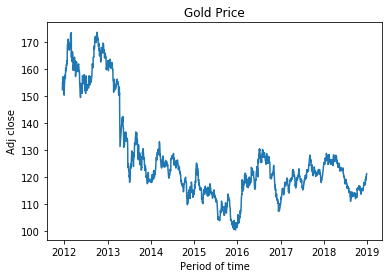

In [209]:
plt.plot(data["Adj Close"])
plt.title("Gold Price")
plt.xlabel("Period of time")
plt.ylabel("Adj close")
plt.show()

#### From the end of 2011 to early of 2016 the price was in downward trend. In 2016 to 2018 the price was between 110 to 130. 

In [18]:
corr_matrix = data.corr().abs()

In [19]:
corr_matrix

Open      High       Low     Close  Adj Close    Volume  \
Open           1.000000  0.999515  0.999442  0.998976   0.998976  0.251921   
High           0.999515  1.000000  0.999262  0.999535   0.999535  0.261064   
Low            0.999442  0.999262  1.000000  0.999532   0.999532  0.237031   
Close          0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
Adj Close      0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
...                 ...       ...       ...       ...        ...       ...   
USO_High       0.634864  0.637208  0.633623  0.635311   0.635311  0.083064   
USO_Low        0.634277  0.636538  0.633140  0.634732   0.634732  0.080475   
USO_Close      0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Adj Close  0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Volume     0.455920  0.454913  0.457628  0.456193   0.456193  0.069580   

                SP_open   SP_high    SP_low  SP_close  ...   GDX_Low  \
Open           0.684314  0.684597  0.683464  0.683998  ...  0.975479   
High           0.688118  0.688365  0.687325  0.687817  ...  0.975650   
Low            0.680911  0.681242  0.679988  0.680567  ...  0.975337   
Close          0.684618  0.684904  0.683750  0.684284  ...  0.975561   
Adj Close      0.684618  0.684904  0.683750  0.684284  ...  0.975561   
...                 ...       ...       ...       ...  ...       ...   
USO_High       0.774626  0.775482  0.773550  0.774799  ...  0.614587   
USO_Low        0.771235  0.772154  0.770087  0.771396  ...  0.613844   
USO_Close      0.773099  0.773957  0.771928  0.773159  ...  0.614733   
USO_Adj Close  0.773099  0.773957  0.771928  0.773159  ...  0.614733   
USO_Volume     0.375568  0.377996  0.371390  0.374658  ...  0.429839   

               GDX_Close  GDX_Adj Close  GDX_Volume  USO_Open  USO_High  \
Open            0.974596       0.974098    0.514230  0.634872  0.634864   
High            0.975341       0.974746    0.508782  0.637101  0.637208   
Low             0.974568       0.974182    0.519988  0.633591  0.633623   
Close           0.975459       0.974980    0.514616  0.635197  0.635311   
Adj Close       0.975459       0.974980    0.514616  0.635197  0.635311   
...                  ...            ...         ...       ...       ...   
USO_High        0.614766       0.600523    0.522581  0.999857  1.000000   
USO_Low         0.613931       0.599819    0.523956  0.999848  0.999818   
USO_Close       0.614915       0.600756    0.523801  0.999699  0.999867   
USO_Adj Close   0.614915       0.600756    0.523801  0.999699  0.999867   
USO_Volume      0.426553       0.421065    0.498816  0.699000  0.695678   

                USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Open           0.634277   0.635138       0.635138    0.455920  
High           0.636538   0.637483       0.637483    0.454913  
Low            0.633140   0.633994       0.633994    0.457628  
Close          0.634732   0.635675       0.635675    0.456193  
Adj Close      0.634732   0.635675       0.635675    0.456193  
...                 ...        ...            ...         ...  
USO_High       0.999818   0.999867       0.999867    0.695678  
USO_Low        1.000000   0.999879       0.999879    0.702665  
USO_Close      0.999879   1.000000       1.000000    0.699221  
USO_Adj Close  0.999879   1.000000       1.000000    0.699221  
USO_Volume     0.702665   0.699221       0.699221    1.000000  

[80 rows x 80 columns]

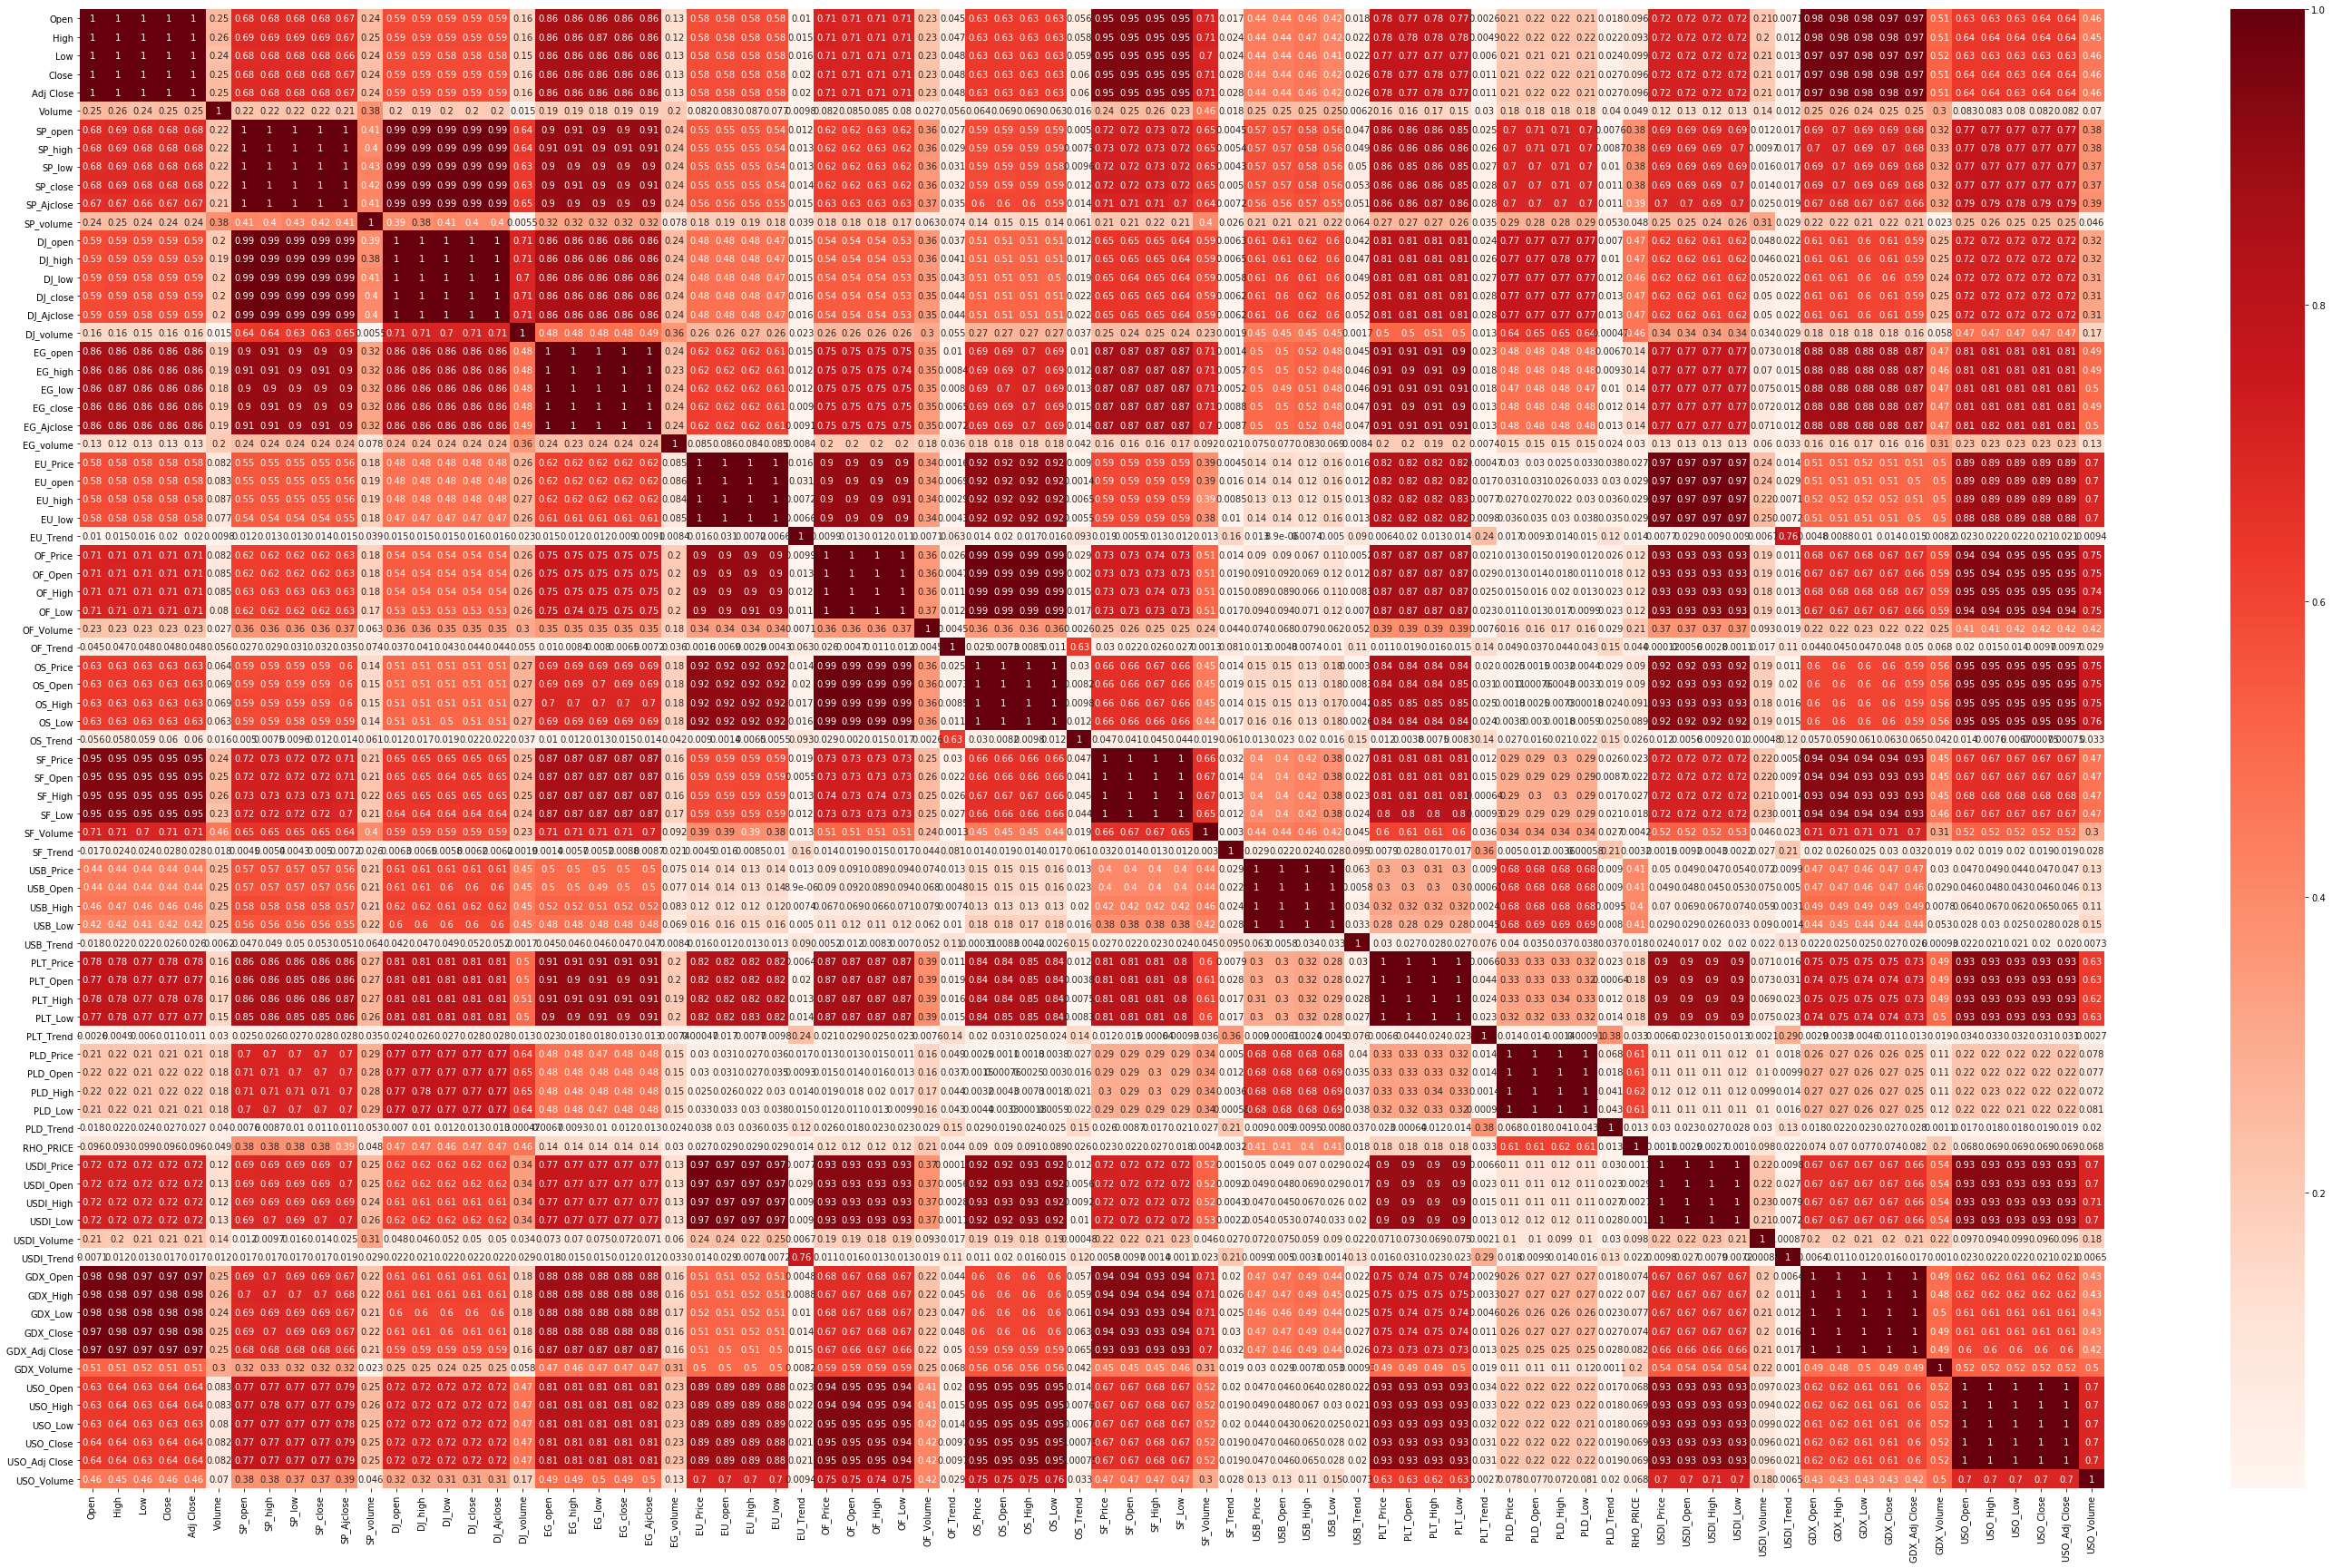

In [20]:
plt.figure(figsize=(50,30))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()

#### Drop the highly co-related features.

In [21]:
all_corr = data.corr().abs()['Adj Close'].sort_values(ascending = False)
all_corr

Close         1.000000
Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
                ...   
PLD_Trend     0.026536
USB_Trend     0.025933
EU_Trend      0.019913
USDI_Trend    0.016641
PLT_Trend     0.011355
Name: Adj Close, Length: 80, dtype: float64

In [22]:
all_corr.shape

(80,)

In [23]:
corr_drop = all_corr[(all_corr > 0.9) & (all_corr!=1.000000)]
corr_drop

High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
Name: Adj Close, dtype: float64

In [24]:
drop_list = list(corr_drop.index)

In [25]:
dataframe = data.drop(drop_list, axis = 1)

#### After removing the highly correlated features.

In [26]:
dataframe.shape

(1718, 69)

#### Removing very less correlated features.

In [27]:
less_corr_drop = all_corr[(all_corr < 0.1) & (all_corr!=0)]
less_corr_drop

RHO_PRICE     0.095782
OS_Trend      0.059510
OF_Trend      0.048205
SF_Trend      0.028100
PLD_Trend     0.026536
USB_Trend     0.025933
EU_Trend      0.019913
USDI_Trend    0.016641
PLT_Trend     0.011355
Name: Adj Close, dtype: float64

In [28]:
less_drop_list = list(less_corr_drop.index)

In [29]:
dataframe = dataframe.drop(less_drop_list, axis = 1)

#### After dropping very less correlated features.

In [30]:
dataframe.shape

(1718, 60)

In [31]:
dataframe.columns

Index(['Date', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low',
       'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low',
       'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open', 'EG_high', 'EG_low',
       'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price', 'EU_open', 'EU_high',
       'EU_low', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume',
       'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'SF_Volume', 'USB_Price',
       'USB_Open', 'USB_High', 'USB_Low', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'USDI_Price',
       'USDI_Open', 'USDI_High', 'USDI_Low', 'USDI_Volume', 'GDX_Volume',
       'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close',
       'USO_Volume'],
      dtype='object')

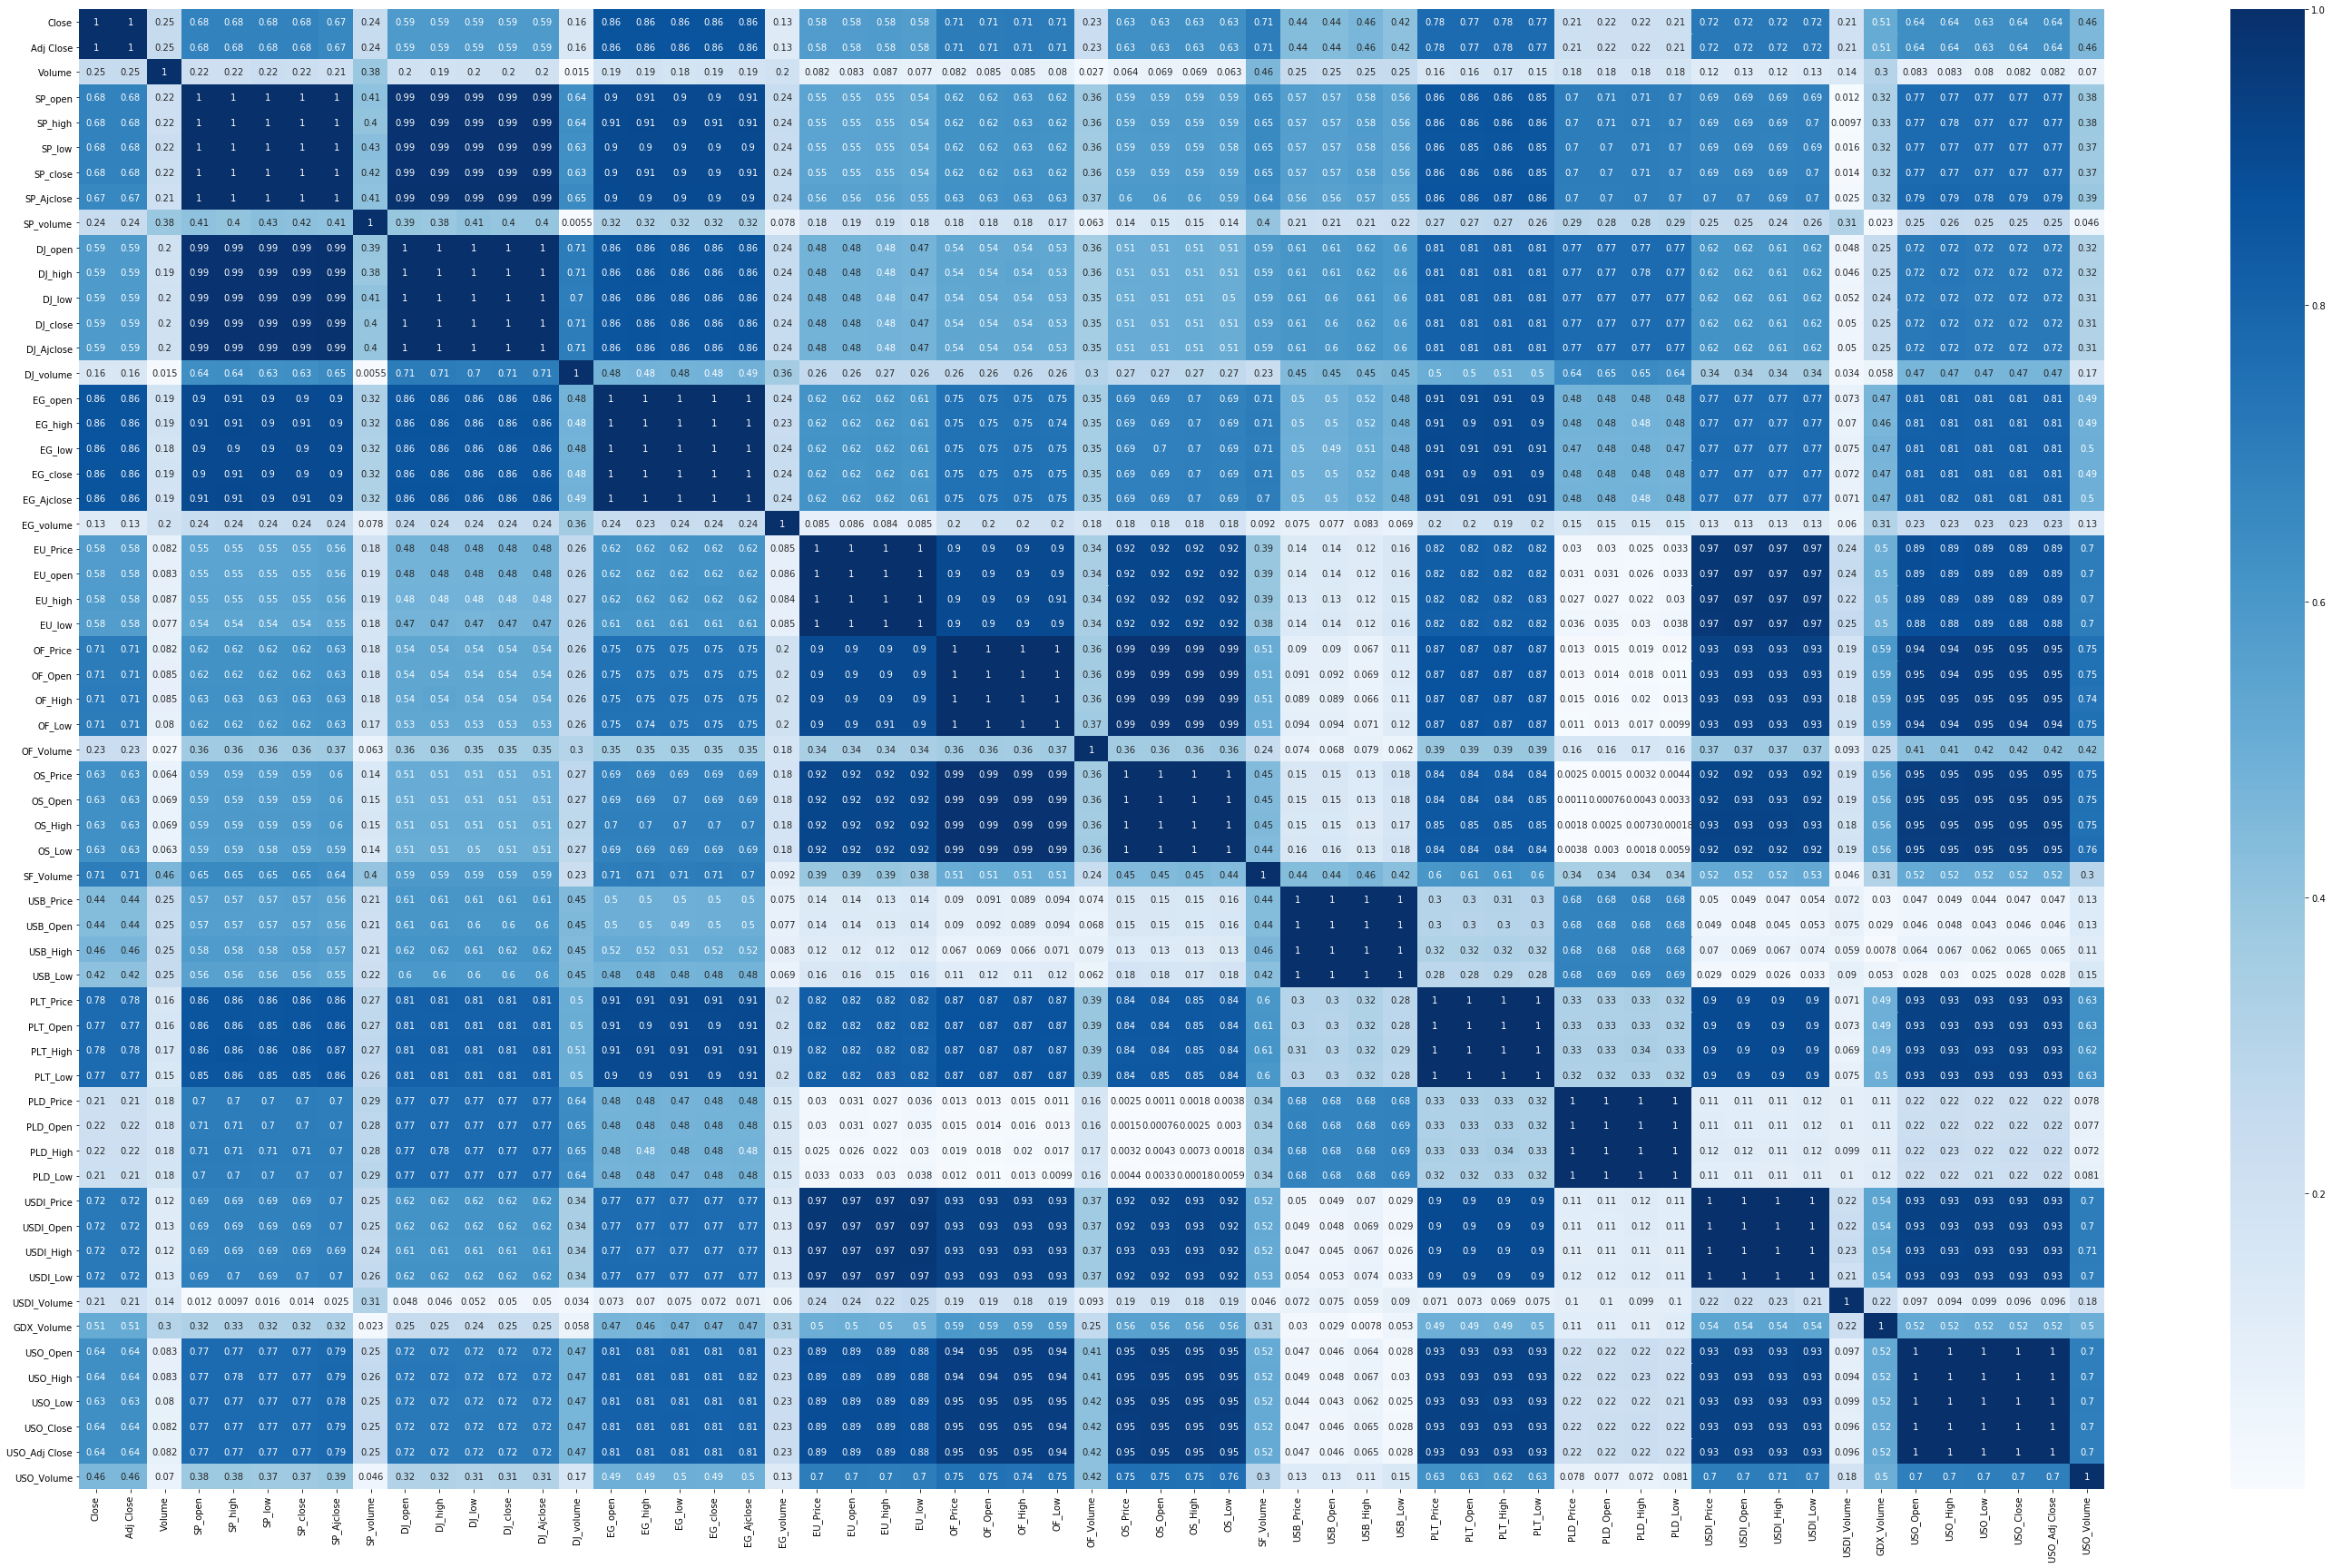

In [32]:
corr_matrix = dataframe.corr().abs()
plt.figure(figsize=(50,30))
sns.heatmap(corr_matrix, cmap="Blues",annot = True)
plt.show()

#### Detecting outliers.

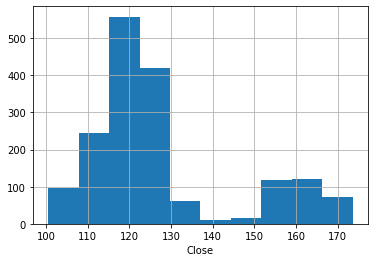

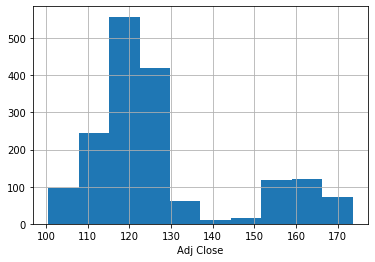

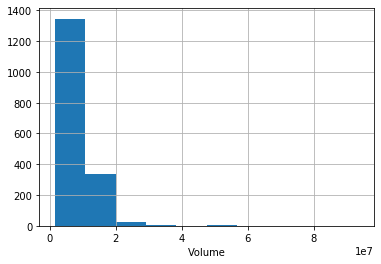

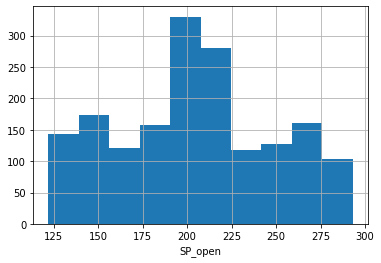

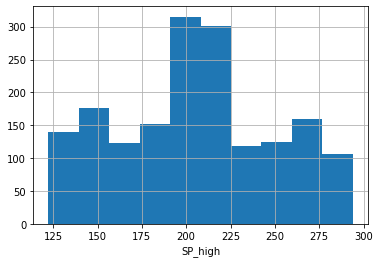

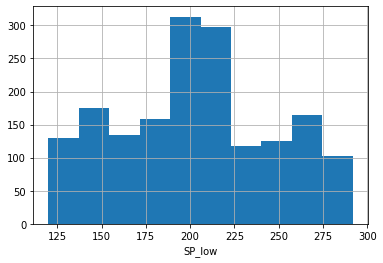

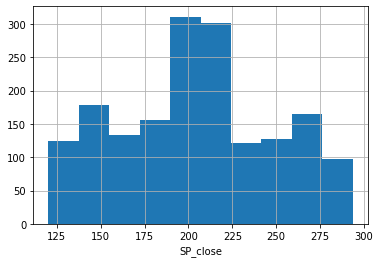

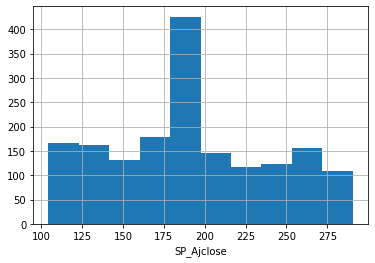

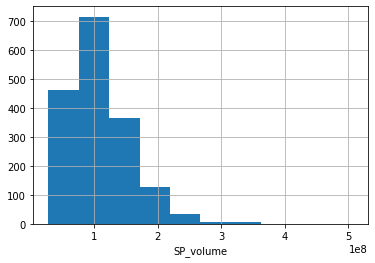

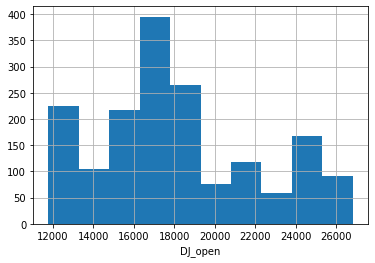

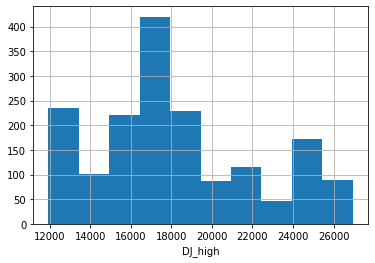

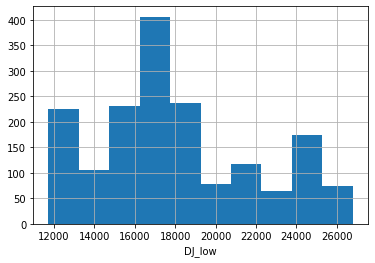

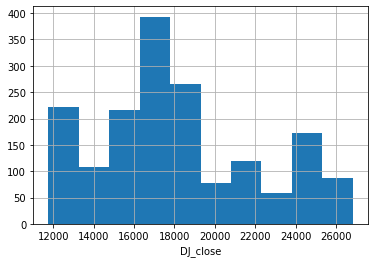

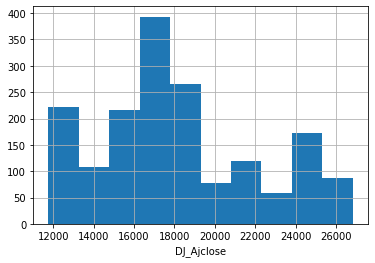

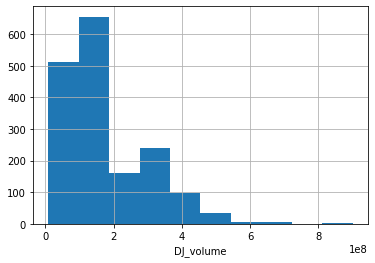

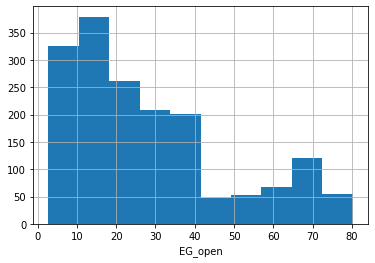

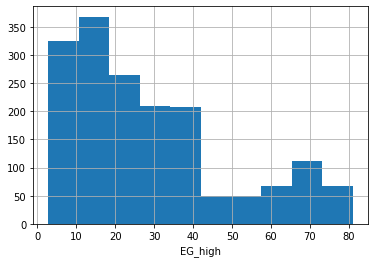

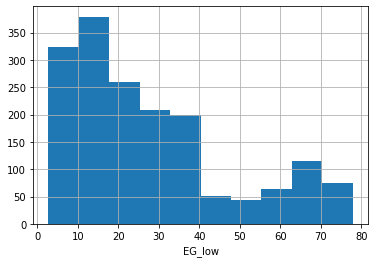

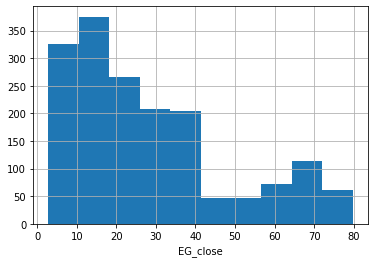

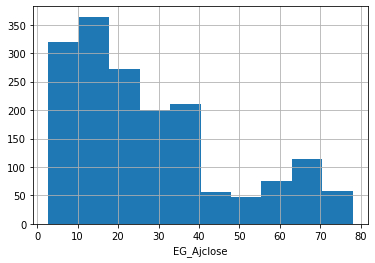

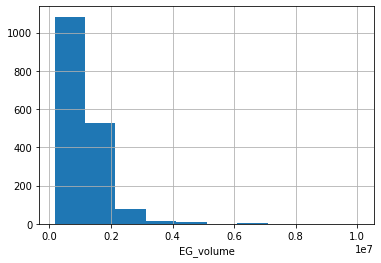

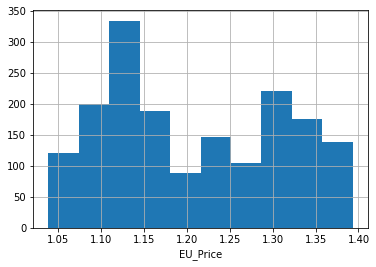

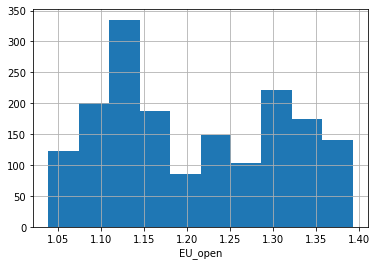

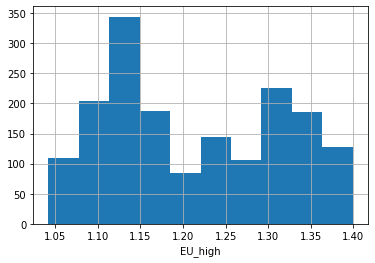

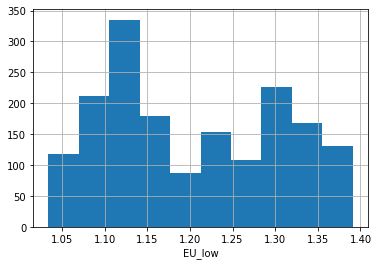

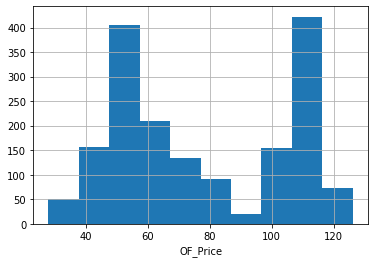

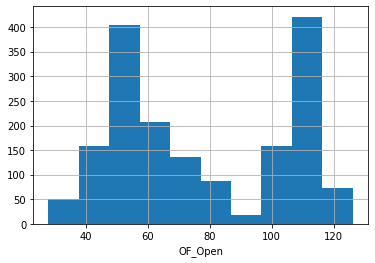

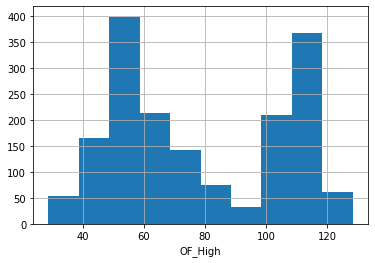

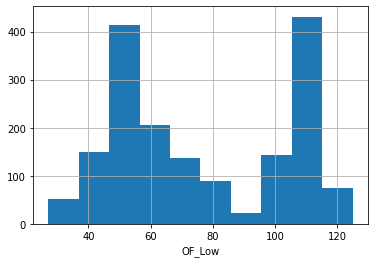

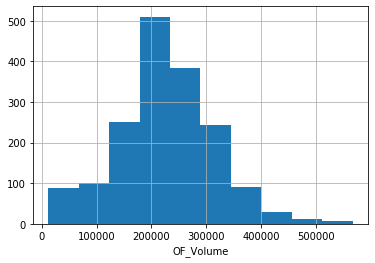

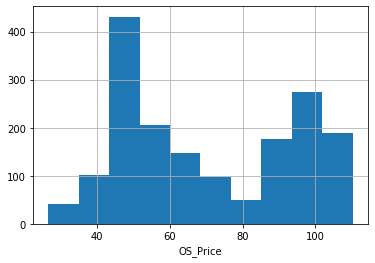

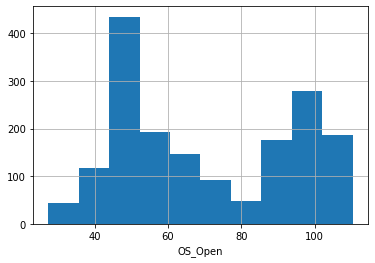

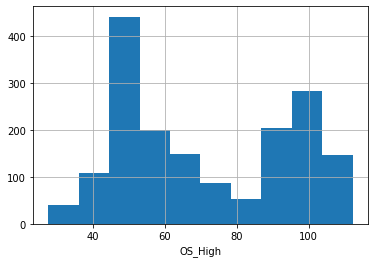

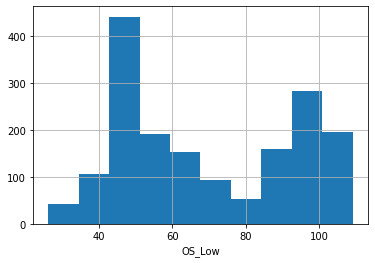

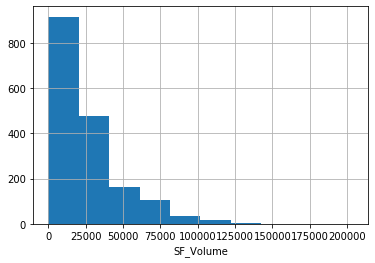

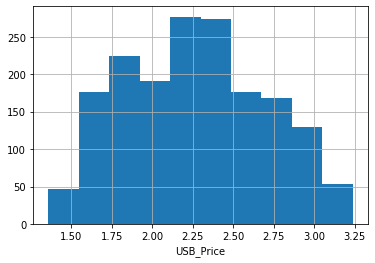

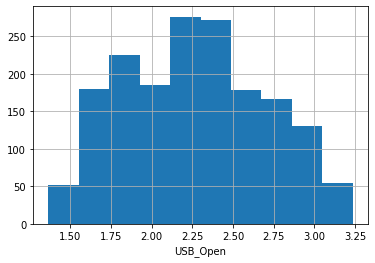

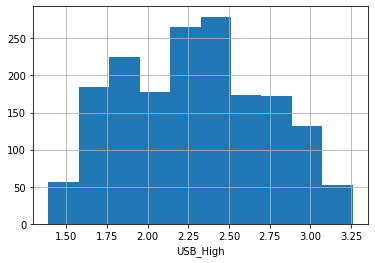

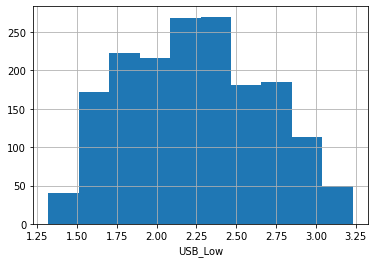

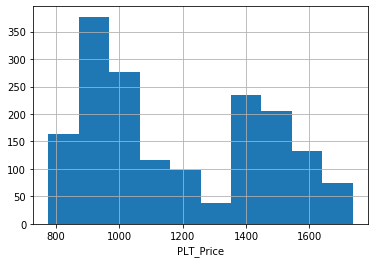

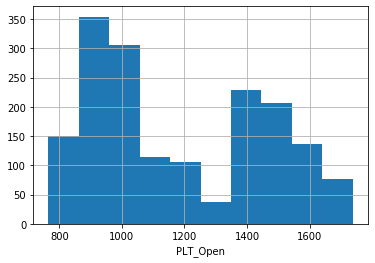

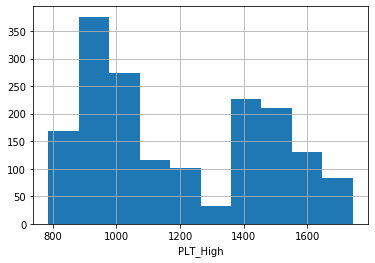

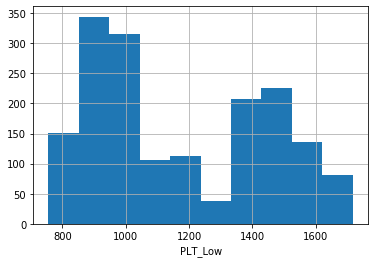

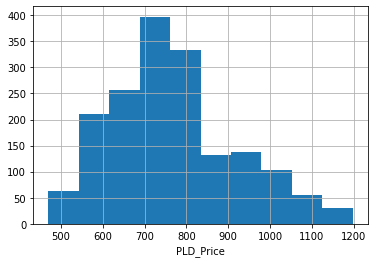

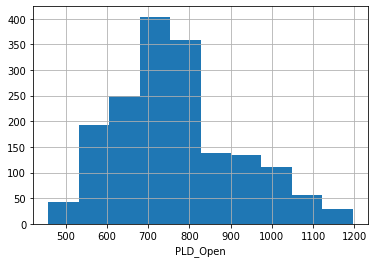

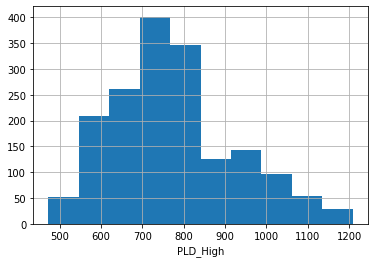

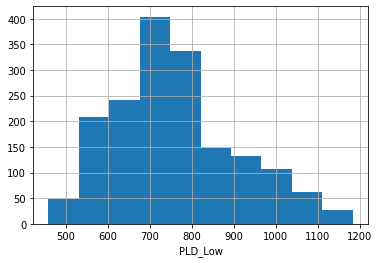

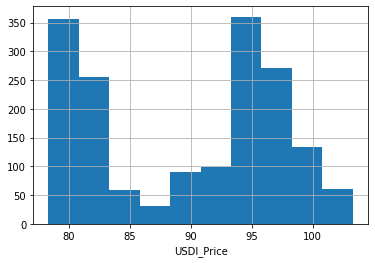

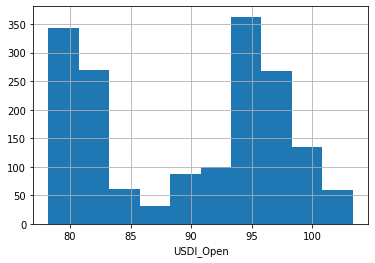

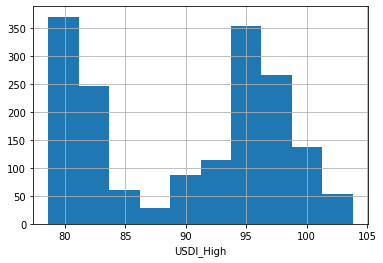

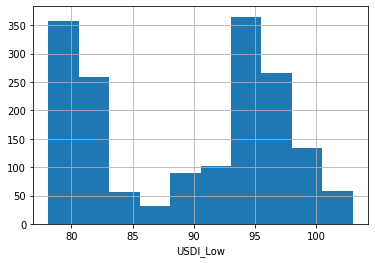

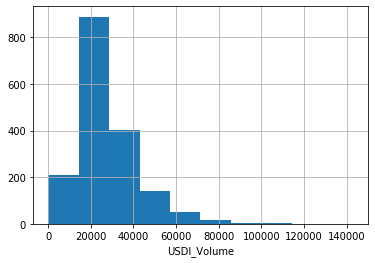

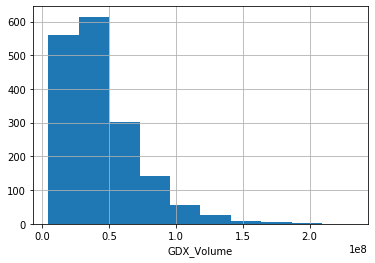

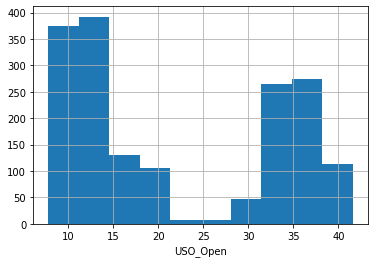

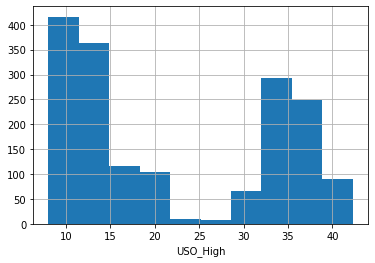

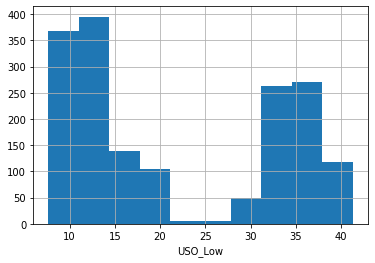

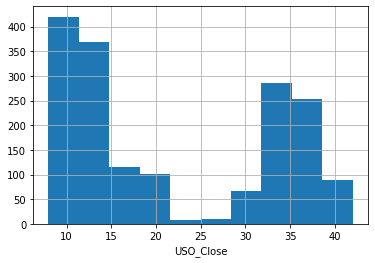

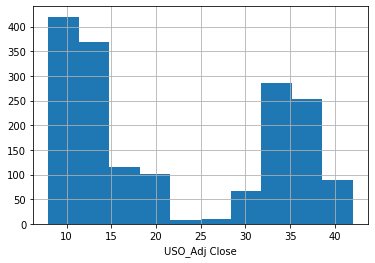

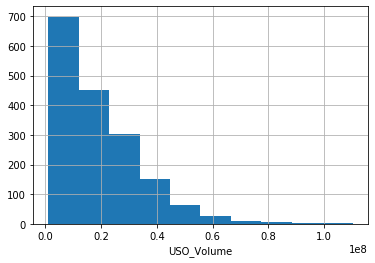

In [33]:
#checking for skewness
numerical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        
        dataframe[feature].hist()
        plt.xlabel(feature)
        plt.show()

#### Log transformation - Normalizing. 

In [34]:
cols = ['Volume', 'SP_volume', 'DJ_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 
        'EG_volume', 'SF_Volume', 'USDI_Volume', 'GDX_Volume', 'USO_Volume']
for feature in cols:
    dataframe[feature] = np.log(dataframe[feature])

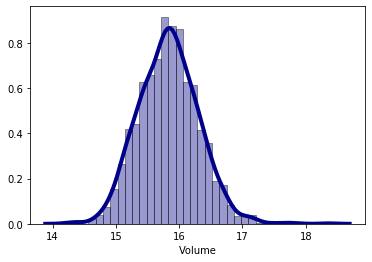

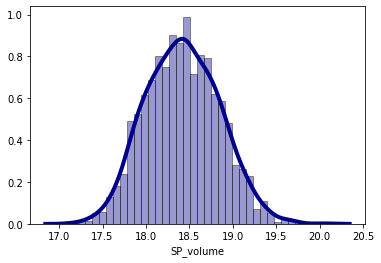

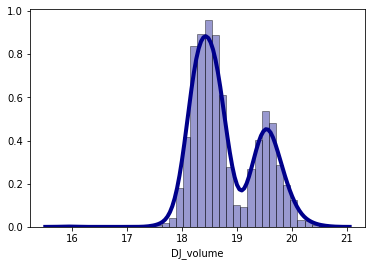

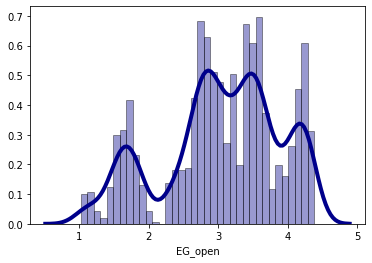

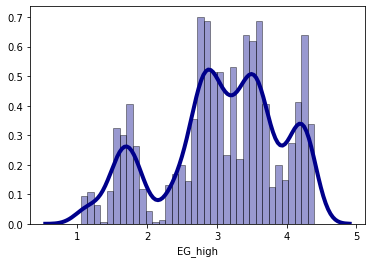

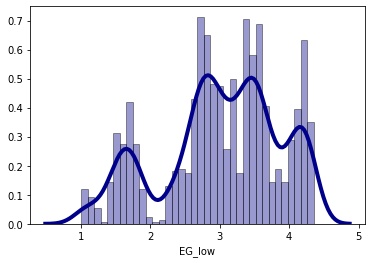

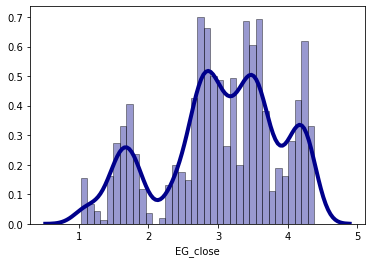

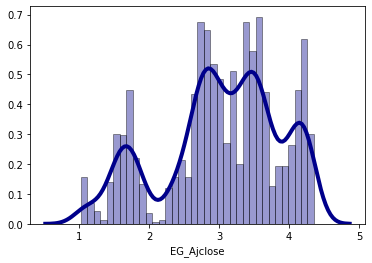

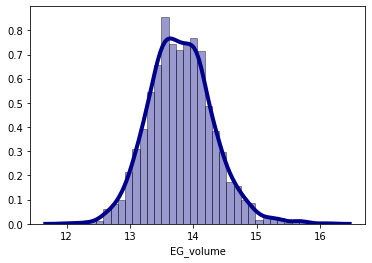

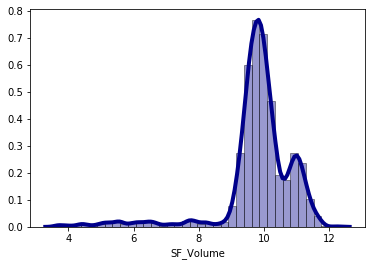

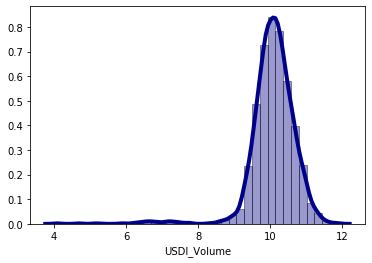

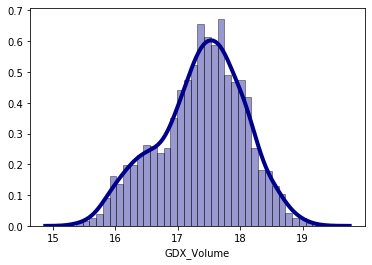

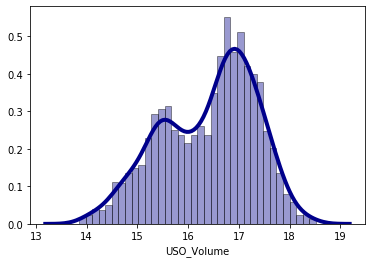

In [35]:
# Density Plot and Histogram of all arrival delays
for feature in cols:
    sns.distplot(dataframe[feature], hist=True, kde=True, 
    bins=int(180/5), color = 'darkblue', 
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 4})
    plt.show()

In [36]:
dataframe = dataframe.drop(['Date'],axis = 1)

#### Separate the Dependent and Independent variables.

In [37]:
X = dataframe.drop(['Adj Close'], axis = 1)
y = dataframe['Adj Close']

#### Scale the data.

In [38]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [39]:
scaled_x

array([[ 1.42663197,  2.23661223, -1.85900428, ...,  1.22673785,
         1.22673785, -0.05725051],
       [ 1.59205133,  1.87144042, -1.87726104, ...,  1.23898681,
         1.23898681, -0.06049755],
       [ 1.57151641,  1.08983096, -1.88114073, ...,  1.23286237,
         1.23286237, -0.63044823],
       ...,
       [-0.38499907,  0.97269729,  0.86902568, ..., -1.09270713,
        -1.09270713,  1.09160029],
       [-0.35704895, -0.19197728,  1.02900121, ..., -1.10058152,
        -1.10058152,  0.58157208],
       [-0.346211  ,  0.24946402,  1.0285447 , ..., -1.0892074 ,
        -1.0892074 ,  0.81911644]])

In [40]:
train_x,test_x,train_y,test_y = train_test_split(scaled_x,y,test_size = 0.3,random_state = 0)

### Decomposition - PCA.
#### Apply PCA to find how many features to select.

In [41]:
covar_matrix = PCA(n_components = 20)

In [42]:
covar_matrix.fit(scaled_x)

PCA(n_components=20)

#### Calculate variance ratio.

In [43]:
variance = covar_matrix.explained_variance_ratio_
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals = 3)*100)
var

array([61.7, 82.2, 85.8, 89. , 90.9, 92.6, 94.1, 95.3, 96.4, 97.3, 98.1,
       98.6, 99. , 99.3, 99.5, 99.7, 99.8, 99.8, 99.8, 99.8])

#### Cummulative variance plot.

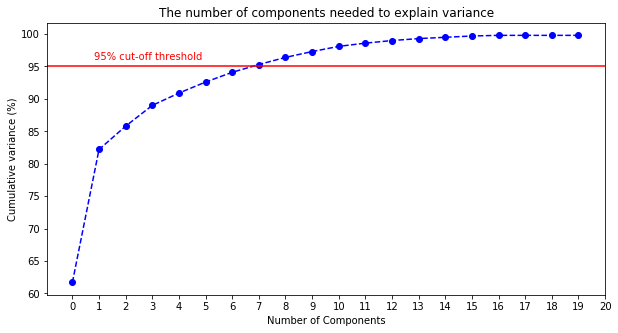

In [44]:
plt.figure(figsize=(10,5))
plt.plot(var,marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.8, 96, '95% cut-off threshold', color = 'red', fontsize=10)
plt.show()

#### In the above plot top features that explined most variance in the data. So number of components = 7 because it accounts 95% variance in the data.

#### Applying PCA with n_components = 7.

In [45]:
pca = PCA(n_components = 7)
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

In [46]:
train_x.shape

(1202, 7)

In [47]:
test_x.shape

(516, 7)

Text(0, 0.5, 'Second principle component (PC1)')

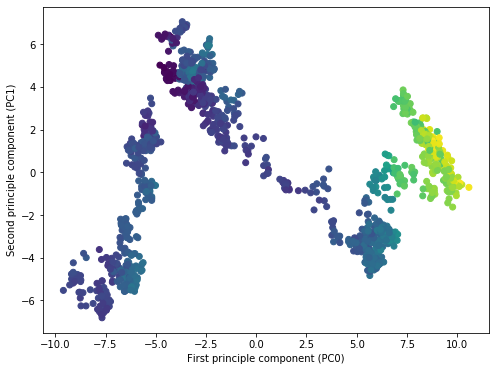

In [48]:
plt.figure(figsize = (8,6))
plt.scatter(train_x[:,0],train_x[:,1],c=train_y)
plt.xlabel("First principle component (PC0)")
plt.ylabel("Second principle component (PC1)")

Text(0, 0.5, 'Second principle component (PC3)')

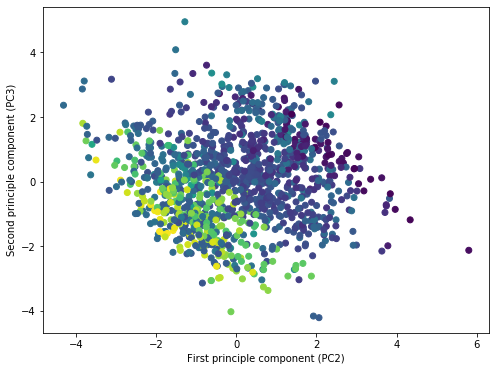

In [49]:
plt.figure(figsize = (8,6))
plt.scatter(train_x[:,2],train_x[:,3],c=train_y)
plt.xlabel("First principle component (PC2)")
plt.ylabel("Second principle component (PC3)")

Text(0, 0.5, 'Second principle component (PC5)')

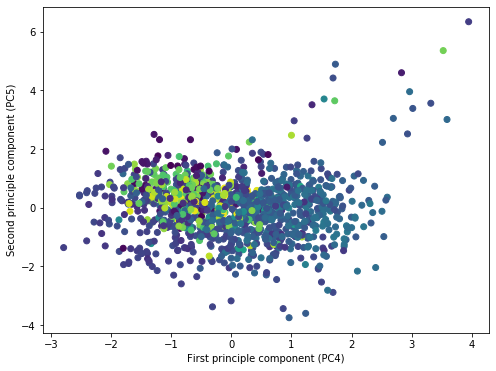

In [50]:
plt.figure(figsize = (8,6))
plt.scatter(train_x[:,4],train_x[:,5],c=train_y)
plt.xlabel("First principle component (PC4)")
plt.ylabel("Second principle component (PC5)")

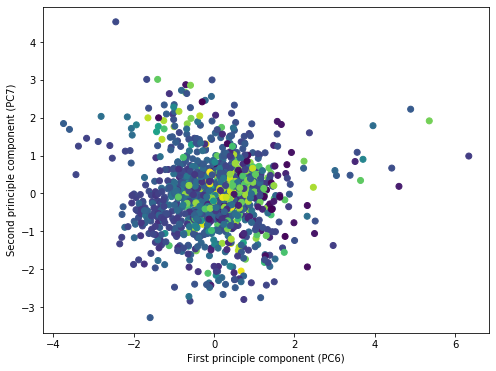

In [51]:
plt.figure(figsize = (8,6))
plt.scatter(train_x[:,5],train_x[:,6],c=train_y)
plt.xlabel("First principle component (PC6)")
plt.ylabel("Second principle component (PC7)")
plt.show()

#### Eigen vectors.

In [52]:
print(pca.components_)

[[ 0.1247573   0.03452004 -0.15487646 -0.15490484 -0.15472396 -0.15477804
  -0.15571517  0.0700537  -0.14839931 -0.14835771 -0.14827429 -0.14828033
  -0.14828033 -0.09161659  0.15252405  0.15240778  0.15266111  0.15244448
   0.15222644 -0.04033786  0.13379538  0.13378926  0.13444711  0.1331031
   0.14283726  0.14271693  0.14295499  0.14255706 -0.06917508  0.13988371
   0.13976737  0.14025259  0.13951538  0.06092048 -0.05619943 -0.05619302
  -0.05910289 -0.05344673  0.16297003  0.16275768  0.16304182  0.16271441
  -0.07652465 -0.07698486 -0.07764818 -0.07634412 -0.14984781 -0.14982381
  -0.14946346 -0.1503312  -0.00468337 -0.10072815  0.15771444  0.15780113
   0.15769617  0.1578321   0.1578321  -0.12347176]
 [-0.00392877  0.04514872 -0.104025   -0.1039269  -0.10385966 -0.10373646
  -0.10183154  0.05306766 -0.13069035 -0.13072503 -0.13067426 -0.13059561
  -0.13059561 -0.11624031  0.0998667   0.10079453  0.09898957  0.10003493
   0.10038817 -0.00928939 -0.14611776 -0.14613743 -0.14512246 

#### Eigen values.

In [53]:
print(pca.explained_variance_)

[35.55129158 11.9037523   2.08374265  1.84548744  1.11538908  1.01254409
  0.86479713]


#### Hyperparameter tuning - Random search CV.

In [54]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### Define model.

In [55]:
RF = RandomForestRegressor()

In [56]:
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [57]:
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

#### Model evaluation before tuning parameters.

In [56]:
#y_pred = RF.predict(test_x)

In [57]:
# print("MSE:",mean_squared_error(test_y,y_pred))
# print("RMSE:",math.sqrt(mean_squared_error(test_y,y_pred)))
# print("MAE:",mean_absolute_error(test_y,y_pred))

MSE: 21.89762523270535
RMSE: 4.679489847483949
MAE: 3.637561614326549


In [58]:
# folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
# cross_validation = cross_val_score(RF, train_x, train_y, scoring='r2', cv=folds, n_jobs=-1)
# cross_validation

array([0.93345828, 0.92107462, 0.93151615, 0.93521226, 0.93677944])

#### Model evaluation after tuning parameters.

In [59]:
y_pred = rf_random.predict(test_x)

In [60]:
print("MSE:",mean_squared_error(test_y,y_pred))
print("RMSE:",math.sqrt(mean_squared_error(test_y,y_pred)))
print("MAE:",mean_absolute_error(test_y,y_pred))

MSE: 5.77985351823152
RMSE: 2.404132591649537
MAE: 1.70280150399635
